In [25]:
# Import packages
import numpy as np
import pandas as pd
import chardet
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time



import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.layers import concatenate
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse, stats
import utils.text_processing as util



In [26]:
# Display plots inline
% matplotlib inline

UsageError: Line magic function `%` not found.


In [27]:
#Parameters
OUTPUT_CLASSES = 22
FILE_NAME = "../Data/processed_data.csv"
SEQUENCE_LENGTH = 350
EMBEDDING_SIZES =[26,300,600,700]
BATCH_SIZE = 32
EPOCH_LENGTH = 10
VALIDATION_PERCENTAGE = 0.2
TEST_SIZE_PERCENTAGE = 0.2
Y_LABEL_NAME="username"


In [28]:
# Define model architecture in keras
# Code reference: https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/
def define_model1(input_len, output_size, vocab_sizes, embedding_dims, verbose = True,
                drop_out_pct = 0.25, conv_filters = 500, activation_fn = 'relu', pool_size = 2, learning = 0.0001):
    """Define n-gram CNN
    
    Args:
    input_len: int. Length of input sequences.
    output_size: int. Number of output classes.
    vocab_size: int. Maximum value of n-gram encoding.
    embedding_dim: int. Size of embedding layer.
    verbose: bool. Whether or not to print model summary.
    drop_out_pct: float. Drop-out rate.
    conv_filters: int. Number of filters in the conv layer.
    activation_fn: string. Activation function to use in the convolutional layer.
    pool_size: int. Pool size for the max pooling layer.
    learning: float. Learning rate for the model optimizer.
    
    Returns:
    model: keras model object. 
    """
    # Channel 1
    inputs1 = Input(shape = (input_len,))
    embedding1 = Embedding(vocab_sizes[0], embedding_dims[0])(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters = conv_filters, kernel_size = 3, activation = activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size = pool_size)(conv1)
    flat1 = Flatten()(pool1)
    
    # Channel 2
    inputs2 = Input(shape = (input_len,))
    embedding2 = Embedding(vocab_sizes[1], embedding_dims[1])(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters = conv_filters, kernel_size = 4, activation = activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size = pool_size)(conv2)
    flat2 = Flatten()(pool2)

    # Channel 3
    inputs3 = Input(shape = (input_len,))
    embedding3= Embedding(vocab_sizes[2], embedding_dims[2])(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters = conv_filters, kernel_size = 5, activation = activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size = pool_size)(conv3)
    flat3 = Flatten()(pool3)
    
    # Merge channels
    merged = concatenate([flat1, flat2, flat3])
    
    # Create output layer
    output = Dense(output_size, activation = 'softmax')(merged)
    
    # Create model
    model = Model(inputs = [inputs1, inputs2, inputs3], outputs = output)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = learning), metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
        
    return model

In [29]:
# Define model architecture in keras
# Code reference: https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/
def define_model2(input_len, output_size, vocab_sizes, embedding_dims, verbose = True,
                drop_out_pct = 0.25, conv_filters = 500, activation_fn = 'relu', pool_size = 2, learning = 0.0001):
    """Define n-gram CNN
    
    Args:
    input_len: int. Length of input sequences.
    output_size: int. Number of output classes.
    vocab_size: int. Maximum value of n-gram encoding.
    embedding_dim: int. Size of embedding layer.
    verbose: bool. Whether or not to print model summary.
    drop_out_pct: float. Drop-out rate.
    conv_filters: int. Number of filters in the conv layer.
    activation_fn: string. Activation function to use in the convolutional layer.
    pool_size: int. Pool size for the max pooling layer.
    learning: float. Learning rate for the model optimizer.
    
    Returns:
    model: keras model object. 
    """
    # Channel 1
    inputs1 = Input(shape = (input_len,))
    embedding1 = Embedding(vocab_sizes[0], embedding_dims[0])(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters = conv_filters, kernel_size = 3, activation = activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size = pool_size)(conv1)
    flat1 = Flatten()(pool1)
    
    # Channel 2
    inputs2 = Input(shape = (input_len,))
    embedding2 = Embedding(vocab_sizes[1], embedding_dims[1])(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters = conv_filters, kernel_size = 4, activation = activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size = pool_size)(conv2)
    flat2 = Flatten()(pool2)

    # Channel 3
    inputs3 = Input(shape = (input_len,))
    embedding3= Embedding(vocab_sizes[2], embedding_dims[2])(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters = conv_filters, kernel_size = 5, activation = activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size = pool_size)(conv3)
    flat3 = Flatten()(pool3)
    
    # Channel 4
    inputs4 = Input(shape = (input_len,))
    embedding4 = Embedding(vocab_sizes[3], embedding_dims[3])(inputs4)
    drop4 = Dropout(drop_out_pct)(embedding4)
    conv4 = Conv1D(filters = conv_filters, kernel_size = 6, activation = activation_fn)(drop4)
    pool4 = MaxPooling1D(pool_size = pool_size)(conv4)
    flat4 = Flatten()(pool4)
    
    # Merge channels
    merged = concatenate([flat1, flat2, flat3, flat4])
    
    # Create output layer
    output = Dense(output_size, activation = 'softmax')(merged)
    
    # Create model
    model = Model(inputs = [inputs1, inputs2, inputs3, inputs4], outputs = output)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = learning), metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
        

In [30]:
data = pd.read_csv(FILE_NAME)
data.head()

,Unnamed: 0,raw_text,username,syllables,periods,hyphens,commas,exclamations,questions,quotes,...,replies,retweets,links,smiles,bigsmiles,winks,bigwinks,unsures,semicolons,hashtags
0,4,"""Appreciate a pair of nice titties",0laotan,11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,"""son",0laotan,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10,me nutting in her means no one else can get h...,0laotan,21,2,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,12,Her being a good person means she's entitled ...,0laotan,24,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,13,this. https://t.co/WiUKzhqXp1,0laotan,3,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Get text and y label
text = data['raw_text']
author = data['username']

**Create training and test subsets**

In [32]:
text_train, text_test, author_train, author_test = train_test_split(text, author, test_size = TEST_SIZE_PERCENTAGE, random_state = 5)

In [33]:
# Check shapes of created datasets
print(np.shape(text_train))
print(np.shape(text_test))
print(np.shape(author_train))
print(np.shape(author_test))

(22298,)
(5575,)
(22298,)
(5575,)


In [ ]:
# Determine vocab sizes for n-grams
vocab_sizes = []
for i in range(1, 4):
    vocab_size = util.get_vocab_size(text_train, i, SEQUENCE_LENGTH)
    vocab_sizes.append(vocab_size)
    print('Vocab size for n =', i, 'is:', vocab_size)

In [35]:
gram1_train = util.create_n_grams(text_train, 1, vocab_sizes[0], SEQUENCE_LENGTH)
gram2_train = util.create_n_grams(text_train, 2, vocab_sizes[1], SEQUENCE_LENGTH)
gram3_train = util.create_n_grams(text_train, 3, vocab_sizes[2], SEQUENCE_LENGTH)

gram1_test = util.create_n_grams(text_test, 1, vocab_sizes[0], SEQUENCE_LENGTH)
gram2_test = util.create_n_grams(text_test, 2, vocab_sizes[1], SEQUENCE_LENGTH)
gram3_test = util.create_n_grams(text_test, 3, vocab_sizes[2], SEQUENCE_LENGTH)

print(np.shape(gram1_train))
print(np.shape(gram2_train))
print(np.shape(gram3_train))

print(np.shape(gram1_test))
print(np.shape(gram2_test))
print(np.shape(gram3_test))

(22298, 350)
(22298, 350)
(22298, 350)
(5575, 350)
(5575, 350)
(5575, 350)


In [36]:
# Determine maximum value of n-gram encodings (this is used to set the CNN embedding dimension)
max_1gram = np.max(gram1_train)
max_2gram = np.max(gram2_train)
max_3gram = np.max(gram3_train)

print('Maximum encoding value for 1-grams is: ', max_1gram)
print('Maximum encoding value for 2-grams is: ', max_2gram)
print('Maximum encoding value for 3-grams is: ', max_3gram)

Maximum encoding value for 1-grams is:  858
Maximum encoding value for 2-grams is:  13102
Maximum encoding value for 3-grams is:  116574


In [37]:
# One hot encode labels
author_lb = LabelBinarizer()
author_lb.fit(author_train)
author_train_hot = author_lb.transform(author_train)
author_test_hot = author_lb.transform(author_test)

In [38]:
# Create the 1-gram model
gram1_model = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES, [max_1gram + 1,max_1gram + 1,max_1gram + 1], EMBEDDING_SIZES)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 350, 26)      22334       ['input_4[0][0]']                
                                                                                            

C:\Users\leobl\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
# Train 1-gram CNN
gram1_model.fit([gram1_train, gram1_train, gram1_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
                verbose = 1, validation_split = VALIDATION_PERCENTAGE)

Epoch 1/10
558/558 [==============================] - 301s 537ms/step - loss: 2.5493 - accuracy: 0.2078 - val_loss: 2.2627 - val_accuracy: 0.3285
Epoch 2/10
558/558 [==============================] - 300s 537ms/step - loss: 2.0690 - accuracy: 0.3823 - val_loss: 1.9894 - val_accuracy: 0.4036
Epoch 3/10
558/558 [==============================] - 290s 520ms/step - loss: 1.7431 - accuracy: 0.4753 - val_loss: 1.8676 - val_accuracy: 0.4500
Epoch 4/10
558/558 [==============================] - 287s 514ms/step - loss: 1.4994 - accuracy: 0.5540 - val_loss: 1.7886 - val_accuracy: 0.4760
Epoch 5/10
558/558 [==============================] - 288s 516ms/step - loss: 1.2929 - accuracy: 0.6168 - val_loss: 1.7559 - val_accuracy: 0.4984
Epoch 6/10
558/558 [==============================] - 289s 519ms/step - loss: 1.1206 - accuracy: 0.6703 - val_loss: 1.7404 - val_accuracy: 0.5103
Epoch 7/10
558/558 [==============================] - 286s 512ms/step - loss: 0.9716 - accuracy: 0.7190 - val_loss: 1.7642 -

In [40]:
# Create the 2-gram model
gram2_model = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES, [max_2gram + 1,max_2gram + 1,max_2gram + 1], EMBEDDING_SIZES)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 350, 26)      340678      ['input_7[0][0]']                
                                                                                            

In [41]:
# Train 2-gram CNN
gram2_model.fit([gram2_train, gram2_train, gram2_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
                verbose = 1, validation_split = VALIDATION_PERCENTAGE)

Epoch 1/10
558/558 [==============================] - 326s 583ms/step - loss: 2.5352 - accuracy: 0.2174 - val_loss: 2.2222 - val_accuracy: 0.3509
Epoch 2/10
558/558 [==============================] - 328s 589ms/step - loss: 1.8729 - accuracy: 0.4566 - val_loss: 1.6919 - val_accuracy: 0.5029
Epoch 3/10
558/558 [==============================] - 324s 581ms/step - loss: 1.4421 - accuracy: 0.5771 - val_loss: 1.4994 - val_accuracy: 0.5583
Epoch 4/10
558/558 [==============================] - 321s 576ms/step - loss: 1.1831 - accuracy: 0.6499 - val_loss: 1.4307 - val_accuracy: 0.5854
Epoch 5/10
558/558 [==============================] - 320s 573ms/step - loss: 0.9925 - accuracy: 0.7096 - val_loss: 1.3674 - val_accuracy: 0.5962
Epoch 6/10
558/558 [==============================] - 319s 572ms/step - loss: 0.8367 - accuracy: 0.7594 - val_loss: 1.3387 - val_accuracy: 0.6052
Epoch 7/10
558/558 [==============================] - 321s 576ms/step - loss: 0.7059 - accuracy: 0.8021 - val_loss: 1.3532 -

In [42]:
# Create the 3-gram model
gram3_model = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES, [max_3gram + 1,max_3gram + 1,max_3gram + 1], EMBEDDING_SIZES)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, 350, 26)      3030950     ['input_10[0][0]']               
                                                                                            

In [43]:
# Train 3-gram CNN
gram3_model.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
                verbose = 1, validation_split = VALIDATION_PERCENTAGE)

Epoch 1/10
558/558 [==============================] - 617s 1s/step - loss: 2.5064 - accuracy: 0.2231 - val_loss: 2.1268 - val_accuracy: 0.3733
Epoch 2/10
558/558 [==============================] - 616s 1s/step - loss: 1.7102 - accuracy: 0.5088 - val_loss: 1.5214 - val_accuracy: 0.5570
Epoch 3/10
558/558 [==============================] - 616s 1s/step - loss: 1.1322 - accuracy: 0.6723 - val_loss: 1.3132 - val_accuracy: 0.6114
Epoch 4/10
558/558 [==============================] - 626s 1s/step - loss: 0.7784 - accuracy: 0.7805 - val_loss: 1.2368 - val_accuracy: 0.6383
Epoch 5/10
493/558 [=========================>....] - ETA: 1:17 - loss: 0.5212 - accuracy: 0.8635

In [ ]:
gram_multi_model = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES, [max_1gram + 1,max_2gram + 1,max_3gram + 1], [EMBEDDING_SIZES[0],EMBEDDING_SIZES[1],EMBEDDING_SIZES[2]])

In [ ]:
# Train multi-gram CNN
gram_multi_model.fit([gram1_train, gram2_train, gram3_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
                verbose = 1, validation_split = VALIDATION_PERCENTAGE)

### Model Evaluation and Validation

**Fit final models and evaluate**

In [ ]:
# Define function for plotting normalized confusion matrix
# Code reference 1: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# Code reference 2: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Args:
    cm: matrix. Confusion matrix for plotting.
    classes: list. List of class labels.
    normalize: bool. Whether or not to normalize the confusion matrix.
    title: string. Title for plot.
    cmap: color map. Color scheme for plot.
    
    Returns:
    None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
       
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    sns.heatmap(df_cm, annot=True, cmap = cmap)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

In [ ]:
data[Y_LABEL_NAME].unique()

In [ ]:
# Fit and evaluate Model 1 (3-gram CNN)

t0 = time.time()

# Fit model
model1 = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES,[max_3gram + 1,max_3gram + 1,max_3gram + 1], EMBEDDING_SIZES)
model1.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, 
           verbose = 1, validation_split = 0.2)
t1 = time.time()

# Predict values for test set
author_pred1 = model1.predict([gram3_test, gram3_test, gram3_test])

t2 = time.time()

# Reverse one-hot encoding of labels
author_pred1 = author_lb.inverse_transform(author_pred1)

# Evaluate
accuracy = accuracy_score(author_test, author_pred1)
precision, recall, f1, support = score(author_test, author_pred1)
ave_precision = np.average(precision, weights = support/np.sum(support))
ave_recall = np.average(recall, weights = support/np.sum(support))
ave_f1 = np.average(f1, weights = support/np.sum(support))
confusion = confusion_matrix(author_test, author_pred1, labels = data['label'].unique())
    
print("Accuracy:", accuracy)
print("Ave. Precision:", ave_precision)
print("Ave. Recall:", ave_recall)
print("Ave. F1 Score:", ave_f1)
print("Training Time:", (t1 - t0), "seconds")
print("Prediction Time:", (t2 - t1), "seconds")
print("Confusion Matrix:\n", confusion)

Normalized confusion matrix
[[0.08333333 0.         0.         ... 0.         0.         0.        ]
 [0.         0.14285714 0.         ... 0.         0.         0.        ]
 [0.         0.         0.15384615 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.45454545 0.         0.        ]
 [0.         0.         0.         ... 0.         0.18181818 0.        ]
 [0.         0.         0.         ... 0.         0.         0.15384615]]


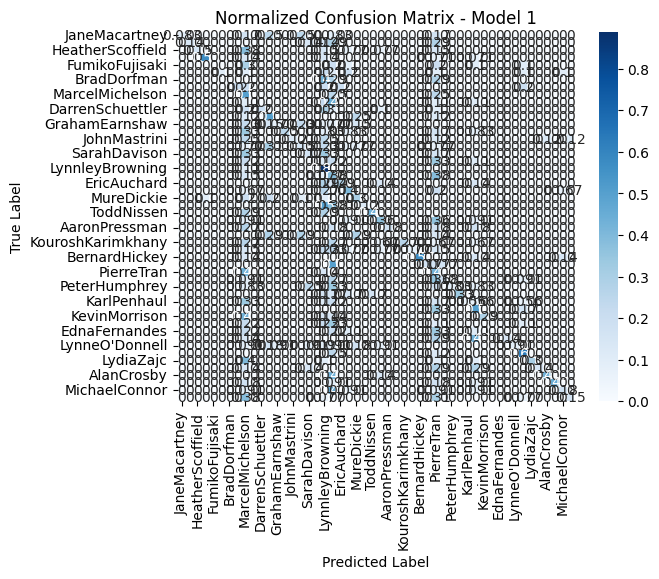

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion, classes=data['label'].unique(), \
                      normalize=True, title='Normalized Confusion Matrix - Model 1')

plt.savefig("confusion1.eps")

Normalized confusion matrix
[[0.75       0.         0.         ... 0.         0.         0.        ]
 [0.         0.71428571 0.         ... 0.         0.         0.        ]
 [0.         0.         0.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.81818182 0.18181818 0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.92307692]]


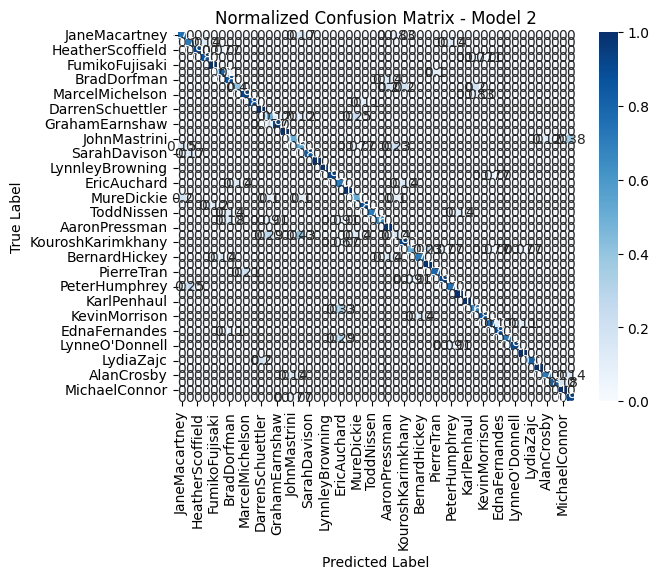

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion, classes=data[Y_LABEL_NAME].unique(), \
                      normalize=True, title='Normalized Confusion Matrix - Model 2')

plt.savefig("confusion2.eps")

In [ ]:
# Get benchmark statistics (random model)

# Perform 10 times and take averages

accuracy_list = []
prec_list = []
recall_list = []
f1_list = []

for i in range(10):
    # Create random predictions
    author_pred3 = np.random.choice(data[Y_LABEL_NAME].unique(), len(author_test))

    # Evaluate
    accuracy = accuracy_score(author_test, author_pred3)
    precision, recall, f1, support = score(author_test, author_pred3)
    ave_precision = np.average(precision, weights = support/np.sum(support))
    ave_recall = np.average(recall, weights = support/np.sum(support))
    ave_f1 = np.average(f1, weights = support/np.sum(support))
    
    accuracy_list.append(accuracy)
    prec_list.append(ave_precision)
    recall_list.append(ave_recall)
    f1_list.append(ave_f1)

print("Accuracy:", accuracy_list, np.mean(accuracy_list), np.std(accuracy_list))
print("Ave. Precision:", prec_list, np.mean(prec_list), np.std(prec_list))
print("Ave. Recall:", recall_list, np.mean(recall_list), np.std(recall_list))
print("Ave. F1 Score:", f1_list, np.mean(f1_list), np.std(f1_list))

Accuracy: [0.022, 0.016, 0.02, 0.02, 0.01, 0.024, 0.026, 0.02, 0.01, 0.016] 0.0184 0.005122499389946279
Ave. Precision: [0.023740692640692642, 0.01768728722258134, 0.018519949494949492, 0.019070379268134686, 0.014267482517482517, 0.026291919191919193, 0.02613846153846154, 0.022698412698412697, 0.009191316526610644, 0.019981704260651628] 0.01975876053598964 0.005060181018034398
Ave. Recall: [0.022, 0.016, 0.02, 0.02, 0.01, 0.024, 0.026000000000000002, 0.02, 0.01, 0.016] 0.0184 0.005122499389946279
Ave. F1 Score: [0.021595038501028542, 0.016075445844593778, 0.018385903570114097, 0.019295739293691605, 0.011434680134680134, 0.023975591757170706, 0.025202172823362755, 0.020401780833123054, 0.009069677871148459, 0.017002590437884556] 0.01824386210667977 0.004848276298054768


**Perform sensitivity analysis**

Sensitivity analysis is performed by creating 3 random (67%) subsets of the training data set and fitting the model to each subset then calculating the evaluation (test) metrics and examining the variability in these metrics.

In [ ]:
# Model 1 Sensitivity Testing

kf = KFold(n_splits = 3)

accuracy_list = []
prec_list = []
recall_list = []
f1_list = []
cnt = 0


for train_inds, _ in kf.split(gram3_train):
    cnt += 1
    print('Run:', cnt)
       
    # Create data subsets
    train_x = np.array([gram3_train[i] for i in train_inds])
    train_y = np.array([author_train_hot[i] for i in train_inds])
       
    # Fit model
    model1 = define_model1(SEQUENCE_LENGTH, OUTPUT_CLASSES, [max_3gram + 1,max_3gram + 1,max_3gram + 1], EMBEDDING_SIZES, verbose = False)
    model1.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=EPOCH_LENGTH, batch_size=BATCH_SIZE, verbose = 0)
    
    # Predict values for test set
    author_pred1 = model1.predict([gram3_test, gram3_test, gram3_test])
    author_pred1 = author_lb.inverse_transform(author_pred1)

    # Evaluate
    accuracy = accuracy_score(author_test, author_pred1)
    precision, recall, f1, support = score(author_test, author_pred1)
    ave_precision = np.average(precision, weights = support/np.sum(support))
    ave_recall = np.average(recall, weights = support/np.sum(support))
    ave_f1 = np.average(f1, weights = support/np.sum(support))
    
    accuracy_list.append(accuracy)
    prec_list.append(ave_precision)
    recall_list.append(ave_recall)
    f1_list.append(ave_f1)

print("Accuracy:", accuracy_list)
print("Ave. Precision:", prec_list)
print("Ave. Recall:", recall_list)
print("Ave. F1 Score:", f1_list)

In [ ]:
def calculate_averages(true, pred, text):
    """Calculate average length of correctly and incorrectly classified examples
    
    Args:
    true: list. List of correct labels.
    pred: list. List of predicted labels.
    text: list. List of text excerpts.
    
    Returns:
    correct_ave_chars: float. Average length of correctly classified examples in characters.
    incorrect_ave_chars: float. Average length of incorrectly classified examples in characters.
    correct_ave_words: float. Average length of correctly classified examples in characters.
    incorrect_ave_words: float. Average length of incorrectly classified examples in characters.
    """
    
    correct_len_chars = []
    incorrect_len_chars = []
    correct_len_words = []
    incorrect_len_words = []

    
    for i in range(len(true)):
        if true[i] == pred[i]:
            correct_len_chars.append(len(text[i]))
            correct_len_words.append(len(text[i].split()))
        else:
            incorrect_len_chars.append(len(text[i]))
            incorrect_len_words.append(len(text[i].split()))
    
    correct_ave_chars = np.mean(correct_len_chars)
    correct_ave_words = np.mean(correct_len_words)
    incorrect_ave_chars = np.mean(incorrect_len_chars)
    incorrect_ave_words = np.mean(incorrect_len_words)
    
    # Conduct two sample t-test
    print('Character t-test')
    print(stats.ttest_ind(correct_len_chars, incorrect_len_chars, equal_var = False))
    
    print('\nWord t-test')
    print(stats.ttest_ind(correct_len_words, incorrect_len_words, equal_var = False))
    
    return correct_ave_chars, correct_ave_words, incorrect_ave_chars, incorrect_ave_words

In [ ]:
# Calculate averages for Model 1
correct_ave_chars1, correct_ave_words1, incorrect_ave_chars1, incorrect_ave_words1\
= calculate_averages(author_test, author_pred1, text_test)

Character t-test
Ttest_indResult(statistic=-0.43497827678074824, pvalue=0.6640726160280028)

Word t-test
Ttest_indResult(statistic=-0.3913401212109419, pvalue=0.6959850506863663)


In [ ]:
print('Model 1 - Average excerpt length (chars) of correct examples =', correct_ave_chars1, 
        'Incorrect exampes =', incorrect_ave_chars1)

print('\nModel 1 - Average excerpt length (words) of correct examples =', correct_ave_words1, 
        'Incorrect exampes =', incorrect_ave_words1)

Model 1 - Average excerpt length (chars) of correct examples = 2830.9189189189187 Incorrect exampes = 2866.3033419023136
Model 2 - Average excerpt length (chars) of correct examples = 2888.478260869565 Incorrect exampes = 2750.7247706422017

Model 1 - Average excerpt length (words) of correct examples = 469.14414414414415 Incorrect exampes = 474.47814910025704
Model 2 - Average excerpt length (words) of correct examples = 478.13554987212274 Incorrect exampes = 455.92660550458714
